# SVM NON Undersampling


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("Jantungafteroutlier.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
1,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
2,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0
3,1,28.87,1,0,0,6,0,1,1,12,2,0,0,4,12,0,0,0
4,0,31.64,1,0,0,5,0,1,1,13,1,1,0,3,9,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289976 entries, 0 to 289975
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      289976 non-null  int64  
 1   BMI               289976 non-null  float64
 2   Smoking           289976 non-null  int64  
 3   AlcoholDrinking   289976 non-null  int64  
 4   Stroke            289976 non-null  int64  
 5   PhysicalHealth    289976 non-null  int64  
 6   MentalHealth      289976 non-null  int64  
 7   DiffWalking       289976 non-null  int64  
 8   Sex               289976 non-null  int64  
 9   AgeCategory       289976 non-null  int64  
 10  Race              289976 non-null  int64  
 11  Diabetic          289976 non-null  int64  
 12  PhysicalActivity  289976 non-null  int64  
 13  GenHealth         289976 non-null  int64  
 14  SleepTime         289976 non-null  int64  
 15  Asthma            289976 non-null  int64  
 16  KidneyDisease     28

In [4]:
df.duplicated().sum()

17551

In [5]:
df.HeartDisease.value_counts()


HeartDisease
0    267583
1     22393
Name: count, dtype: int64

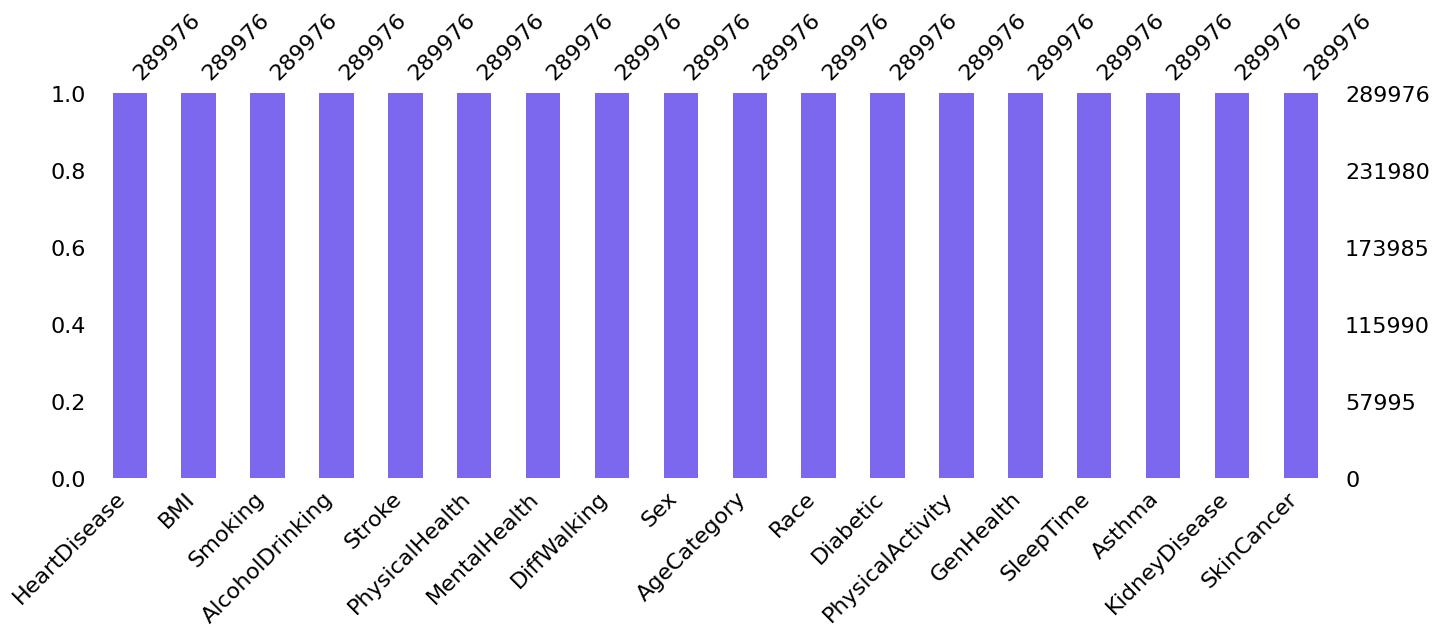

In [6]:
msno.bar(df, figsize = (16,5),color = "#7B68EE")
plt.show()

C:\Users\M S I\AppData\Local\Temp\ipykernel_12016\1611175011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=df, palette='pastel')


<Axes: xlabel='HeartDisease', ylabel='count'>

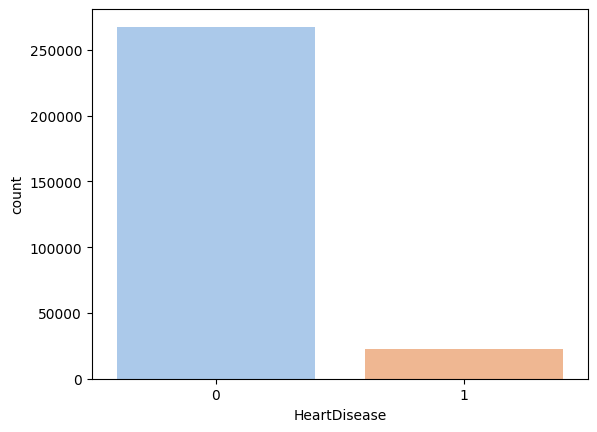

In [7]:
sns.countplot(x='HeartDisease',data=df, palette='pastel')

In [8]:
# Menghitung jumlah masing-masing kelas
class_counts = df['HeartDisease'].value_counts()

# Menampilkan jumlah masing-masing kelas
print("Jumlah masing-masing kelas:")
print(class_counts)

# Menghitung rasio
total = class_counts.sum()
class_ratios = class_counts / total

# Menampilkan rasio
print("\nRasio masing-masing kelas:")
print(class_ratios)

# Menampilkan rasio dalam bentuk persentase
print("\nRasio masing-masing kelas (dalam persen):")
print(class_ratios * 100)

Jumlah masing-masing kelas:
HeartDisease
0    267583
1     22393
Name: count, dtype: int64

Rasio masing-masing kelas:
HeartDisease
0    0.922776
1    0.077224
Name: count, dtype: float64

Rasio masing-masing kelas (dalam persen):
HeartDisease
0    92.277637
1     7.722363
Name: count, dtype: float64


### Split Data

In [9]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

print("X : ", X.shape)
print("y : ", y.shape)


X :  (289976, 17)
y :  (289976,)


In [10]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [11]:
from sklearn.model_selection import train_test_split

# Tentukan ukuran test set (misal: 20%)
test_size = 0.2

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data train:", len(X_train), "Data test:", len(X_test))


Data train: 231980 Data test: 57996


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Lakukan scaling pada fitur X


### Modeling SVM

In [15]:

clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     53442
           1       0.00      0.00      0.00      4554

    accuracy                           0.92     57996
   macro avg       0.46      0.50      0.48     57996
weighted avg       0.85      0.92      0.88     57996

Akurasi SVM : 92.15%


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [25]:
clf = SVC(kernel = 'poly' , degree=3, C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     15272
           1       0.00      0.00      0.00       722

    accuracy                           0.95     15994
   macro avg       0.48      0.50      0.49     15994
weighted avg       0.91      0.95      0.93     15994

Akurasi SVM : 95.49%


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [26]:
clf = SVC(kernel = 'sigmoid' , gamma=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     15272
           1       0.08      0.08      0.08       722

    accuracy                           0.92     15994
   macro avg       0.52      0.52      0.52     15994
weighted avg       0.92      0.92      0.92     15994

Akurasi SVM : 91.78%


In [27]:
clf = SVC(kernel = 'rbf' , gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     15272
           1       0.00      0.00      0.00       722

    accuracy                           0.95     15994
   macro avg       0.48      0.50      0.49     15994
weighted avg       0.91      0.95      0.93     15994

Akurasi SVM : 95.49%


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
# Model tanpa tuning
model_default = SVC()  # Default parameters
model_default.fit(X_train, y_train)
y_test_pred_default = model_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_test_pred_default)
print("Default Model Test Accuracy:", default_accuracy)


Default Model Test Accuracy: 0.9548580717769164


In [16]:
# Model tanpa tuning
model_default = SVC()  # Default parameters
model_default.fit(X_train, y_train)
y_test_pred_default = model_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_test_pred_default)
print("Default Model Test Accuracy:", default_accuracy)


Default Model Test Accuracy: 0.9227877784674805


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid for tuning
param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1]}
]

# Initialize variables to track the best parameters and model
best_params = None
best_model = None
best_accuracy = -np.inf  # Start with a very low accuracy

# Iterate over parameter combinations manually
for params in param_grid:
    kernel = params['kernel'][0]
    C_values = params['C']
    gamma_values = params.get('gamma', [None])  # Default to None for linear kernel
    
    for C in C_values:
        for gamma in gamma_values:
            # Initialize the model with current parameters
            if kernel == 'linear':
                model = SVC(kernel=kernel, C=C)
            else:  # For rbf kernel
                model = SVC(kernel=kernel, C=C, gamma=gamma)
            
            # Fit the model on the training data
            model.fit(X_train, y_train)
            
            # Evaluate the model on the test set
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Update the best model if the current model performs better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'kernel': kernel, 'C': C}
                if kernel == 'rbf':
                    best_params['gamma'] = gamma
                best_model = model

# Print the best parameters found
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", best_accuracy)


Best Parameters: {'kernel': 'linear', 'C': 0.01}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     15272
           1       0.00      0.00      0.00       722

    accuracy                           0.95     15994
   macro avg       0.48      0.50      0.49     15994
weighted avg       0.91      0.95      0.93     15994

Accuracy: 0.9548580717769164


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [31]:
from sklearn.model_selection import cross_val_score

# Model terbaik dari Grid Search
best_model = grid.best_estimator_

# Evaluasi performa akhir menggunakan k-fold CV
scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
print("Final Accuracy:", scores.mean())


Final Accuracy: 0.9532062830214659


Confusion Matrix:
[[53442     0]
 [ 4554     0]]


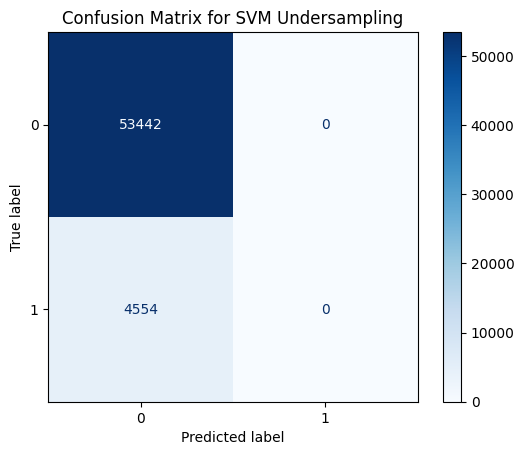

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam Bentuk Teks
print("Confusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM Undersampling")
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98     15272
           1       0.00      0.00      0.00       722

    accuracy                           0.95     15994
   macro avg       0.48      0.50      0.49     15994
weighted avg       0.91      0.95      0.93     15994



c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Testing

In [18]:
new_data = {
    'BMI'	: [10.0],
    'Smoking'	: [1],
    'AlcoholDrinking' : [1],
    'Stroke'	: [1],
    'PhysicalHealth' : [9],
    'MentalHealth'	: [10],
    'DiffWalking'	: [1],
    'Sex'	: [1],
    'AgeCategory' : [12],
    'Race' : [1],
    'Diabetic' : [1],
    'PhysicalActivity' : [0],
    'GenHealth'	: [4],
    'SleepTime'	: [2],
    'Asthma'	: [1],
    'KidneyDisease'	: [1],
    'SkinCancer' : [1]
}

new_data = pd.DataFrame(new_data)
new_data

scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [0]


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [19]:
new_data = {
    'BMI'	: [34.3],
    'Smoking'	: [0],
    'AlcoholDrinking' : [0],
    'Stroke'	: [1],
    'PhysicalHealth' : [50],
    'MentalHealth'	: [50],
    'DiffWalking'	: [1],
    'Sex'	: [1],
    'AgeCategory' : [1],
    'Race' : [1],
    'Diabetic' : [0],
    'PhysicalActivity' : [1],
    'GenHealth'	: [2],
    'SleepTime'	: [5],
    'Asthma'	: [0],
    'KidneyDisease'	: [0],
    'SkinCancer' : [0]
}

new_data = pd.DataFrame(new_data)
new_data

scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [0]


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### mencetak model

In [27]:
import pickle
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# # Membuat dataset contoh
#X, y = make_classification(n_samples=100, n_features=5, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Membuat model SVM
model = SVC(kernel='linear', C=1, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Menyimpan model ke file .pkl
with open('svm_nonundersampling.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke file svm_nonundersampling.pkl")


Model berhasil disimpan ke file svm_nonundersampling.pkl


In [29]:
# Membaca model dari file .pkl
with open('svm_nonundersampling.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model berhasil dimuat kembali")
# Anda bisa menggunakan model ini untuk prediksi
# predictions = loaded_model.predict(X_test)


Model berhasil dimuat kembali


In [30]:
# Muat model dari file .pkl
with open('svm_nonundersampling.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Gunakan model untuk prediksi
predictions = loaded_model.predict(X_test)
print("Prediksi:", predictions)


Prediksi: [0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1]


In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Assuming you have your training and testing data (X_train, X_test, y_train, y_test)

# Create the model pipeline
model_numpy = make_pipeline(StandardScaler(), LinearSVC())

# Train the model
model_numpy.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_numpy.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Save the trained model (replace with your preferred filename)
with open("model_numpy.pkl", "wb") as model_file:
    pickle.dump(model_numpy, model_file)


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      1.00      0.98     15272
           1       0.00      0.00      0.00       722

    accuracy                           0.95     15994
   macro avg       0.48      0.50      0.49     15994
weighted avg       0.91      0.95      0.93     15994



c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [39]:
#load model
with open('model_numpy.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [40]:
# Tanpa tuning, gunakan model default
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

# Dapatkan probabilitas prediksi
y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

# Simpan ke file .csv
results_svm = pd.DataFrame({
    'y_test': y_test,
    'y_prob': y_prob_svm
})
results_svm.to_csv('svm_nonundersampling.csv', index=False)

print("Hasil dengan model default disimpan ke 'svm_nonundersampling.csv'")


Hasil dengan model default disimpan ke 'svm_nonundersampling.csv'
